## TP2

#### Detección de direcciones

In [1]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [34]:
img = cv.imread('metalgrid.jpg',0)

In [ ]:
# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

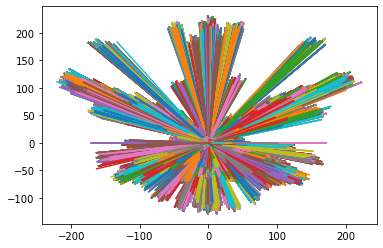

In [33]:
# Dibujamos todas las direcciones mod + ang para ver las direcciones que predominan
M, N = mag.shape
fig = plt.figure()
for i in range(1,M):
    for j in range(1,N):
        x = np.array([0, 0])
        y = np.array([0, 0])
        y[1] = mag[i,j] * np.sin(theta[i,j])
        x[1] = mag[i,j] * np.cos(theta[i,j])
        plt.plot(x,y)
        
plt.show()
        

In [35]:
# Supresión de no-máximos
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            
        # Supresión de no-máximos
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0
        


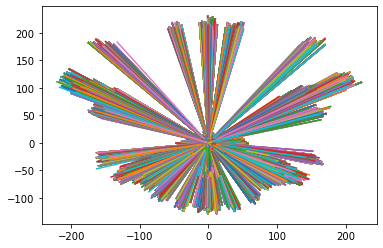

In [37]:
fig = plt.figure()
for i in range(1,M):
    for j in range(1,N):
        if Non_max[i,j] == 0:
            continue
        x = np.array([0, 0])
        y = np.array([0, 0])
        y[1] = Non_max[i,j] * np.sin(theta[i,j])
        x[1] = Non_max[i,j] * np.cos(theta[i,j])
        plt.plot(x,y)
        
plt.show()

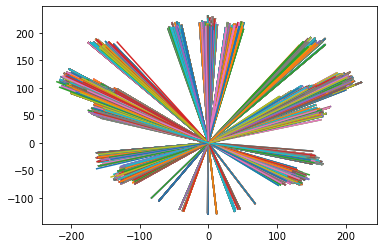

In [40]:
threshold = 255 / 2.0

fig = plt.figure()
for i in range(1,M):
    for j in range(1,N):
        if Non_max[i,j] == 0:
            continue

        if abs(Non_max[i,j]) >= threshold:
            x = np.array([0, 0])
            y = np.array([0, 0])
            y[1] = Non_max[i,j] * np.sin(theta[i,j])
            x[1] = Non_max[i,j] * np.cos(theta[i,j])
            plt.plot(x,y)
        
plt.show()